In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sps

from cartopy.util import add_cyclic_point
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec
from matplotlib.lines import Line2D

from matplotlib import rc
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

colors={'direct':'#3d7f1e',
        'indirect':'#b1116d',
        'total':'darkorange'
        }

In [2]:
aod_sp_2005 = xr.open_dataset('../datasets/aod_sp_2005.nc')
aod_sp_2005_yearsum = xr.open_dataset('../datasets/aod_sp_2005_yearsum.nc')

MACSP_dir = '/home/anthe/documents/misu/thesis/'
macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')


In [3]:
aod_sp_2005_yearsum

<xarray.Dataset>
Dimensions:    (time: 1, bnds: 2, lon: 96, lat: 48)
Coordinates:
  * time       (time) datetime64[ns] 1855-07-16T11:30:00
  * lon        (lon) float64 0.0 3.75 7.5 11.25 15.0 ... 345.0 348.8 352.5 356.2
  * lat        (lat) float64 87.16 83.48 79.78 76.07 ... -79.78 -83.48 -87.16
Dimensions without coordinates: bnds
Data variables: (12/21)
    time_bnds  (time, bnds) datetime64[ns] ...
    aod_sp     (time, lat, lon) float32 ...
    aod_bg     (time, lat, lon) float32 ...
    aod_sp1    (time, lat, lon) float32 ...
    aod_bg1    (time, lat, lon) float32 ...
    aod_sp2    (time, lat, lon) float32 ...
    ...         ...
    aod_sp7    (time, lat, lon) float32 ...
    aod_bg7    (time, lat, lon) float32 ...
    aod_sp8    (time, lat, lon) float32 ...
    aod_bg8    (time, lat, lon) float32 ...
    aod_sp9    (time, lat, lon) float32 ...
    aod_bg9    (time, lat, lon) float32 ...
Attributes: (12/18)
    CDI:               Climate Data Interface version 2.0.4 (https://mpimet.m...
    Conventions:       CF-1.4
    source:            ECHAM6.3
    institution:       Max-Planck-Institute for Meteorology
    title:             abrupt-aerosol_1xemissions_bg1_2005_r1_all-plumes_aod_bg
    echam_version:     6.3.05
    ...                ...
    host_name:         n161
    jsbach_version:    3.20p1
    truncation:        31
    history:           Sun Jul 23 23:33:06 2023: cdo --reduce_dim -yearsum ao...
    frequency:         year
    CDO:               Climate Data Operators version 2.0.4 (https://mpimet.m...

In [4]:
macsp.plume_number

<xarray.DataArray 'plume_number' (plume_number: 9)>
array([1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int32)
Coordinates:
  * plume_number  (plume_number) int32 1 2 3 4 5 6 7 8 9
Attributes:
    long_name:  plume number

In [23]:
def aod_sp(year):
   # aod_sp_2005 = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005.nc')
    aod_sp_2005_yearmean = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_yearmean.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    aod = aod_sp_2005_yearmean.aod_sp * 0

    for i in np.arange(1 , 10, 1):
        aod += (aod_sp_2005_yearmean[f'aod_sp{i}'] 
                #+ aod_sp_2005_yearmean[f'aod_bg{i}']
                ) * macsp.year_weight.sel(plume_number=i).sel(years=year)

    return aod

0

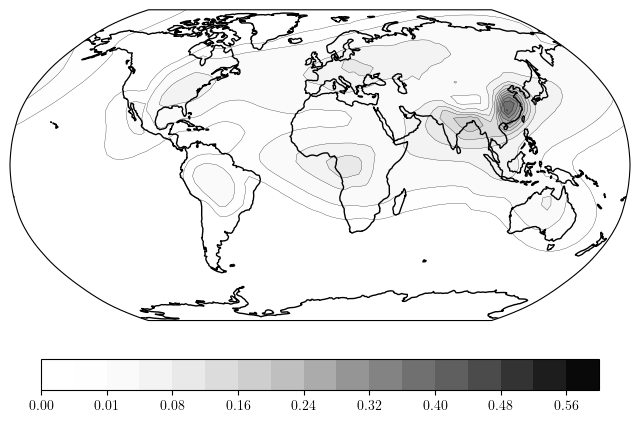

In [24]:
def plot(year):
    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle))

    #var = aod_sp(2005)
    var = aod_sp(year)
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    level = [0, 0.0025, 0.01, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44, 0.48, 0.52, 0.56, 0.6]
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='Greys',
        levels= level,
        #locator=ticker.LogLocator()
        #extend='both',
    )
    C = ax.contour(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        colors='black',
        levels= level,
        #alpha=0.8,
        linewidths=.2
    )
    axins = inset_axes(ax, width='90%', height='10%', loc='lower center', borderpad= -5)
    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04)#, ticks=np.arange(Nmin, Nmax + 1, 2.5), label=label)
    ax.coastlines()

    return 0
plot(2005)

0

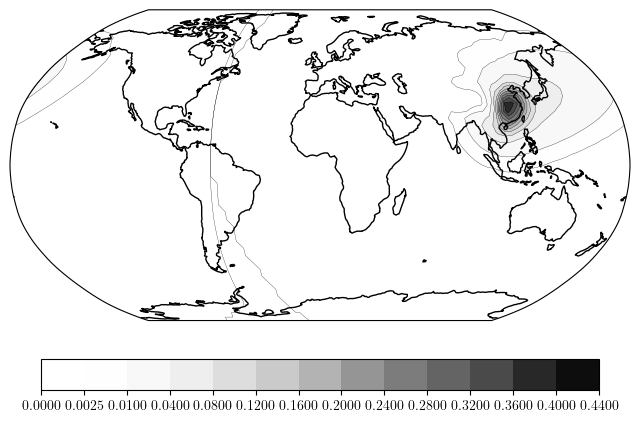

In [17]:
def plot(year):
    aod_sp_2005_yearmean = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_yearmean.nc').squeeze()
    central_longitude = 0
    projectionStyle = ccrs.Robinson(central_longitude=central_longitude)

    fig, ax = plt.subplots(figsize=(8, 5), subplot_kw=dict(projection=projectionStyle))

    var = aod_sp_2005_yearmean.aod_sp3.squeeze()
    lon = var.coords['lon']
    lon_idx = var.dims.index('lon')
    wrap_var, wrap_lon = add_cyclic_point(var.values, coord=lon, axis=lon_idx)

    level = [0, 0.0025, 0.01, 0.04, 0.08, 0.12, 0.16, 0.2, 0.24, 0.28, 0.32, 0.36, 0.4, 0.44]
    pc = ax.contourf(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        cmap='Greys',
        levels= level,
        #locator=ticker.LogLocator()
        #extend='both',
    )
    C = ax.contour(wrap_lon,
        var.lat,
        wrap_var,
        transform=ccrs.PlateCarree(),
        colors='black',
        levels= level,
        #alpha=0.8,
        linewidths=.2
    )
    axins = inset_axes(ax, width='90%', height='10%', loc='lower center', borderpad= -5)
    cb = plt.colorbar(pc, cax=axins, ax=ax, orientation='horizontal', pad=0.04, ticks=level)

    ax.coastlines()

    return 0
plot(2005)

In [8]:
def diff():
   # aod_sp_2005 = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005.nc')
    data = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldsum_yearsum.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    aod = data.aod_sp * 0

    for i in np.arange(1 , 10, 1):
        aod += data[f'aod_sp{i}']

    return aod, data.aod_sp.values

In [9]:
sum, sp = diff()
print(sum)
print(sp)

<xarray.DataArray 'aod_sp' ()>
array(716.06730366)
Coordinates:
    time     datetime64[ns] 1855-07-16T11:30:00
716.1913


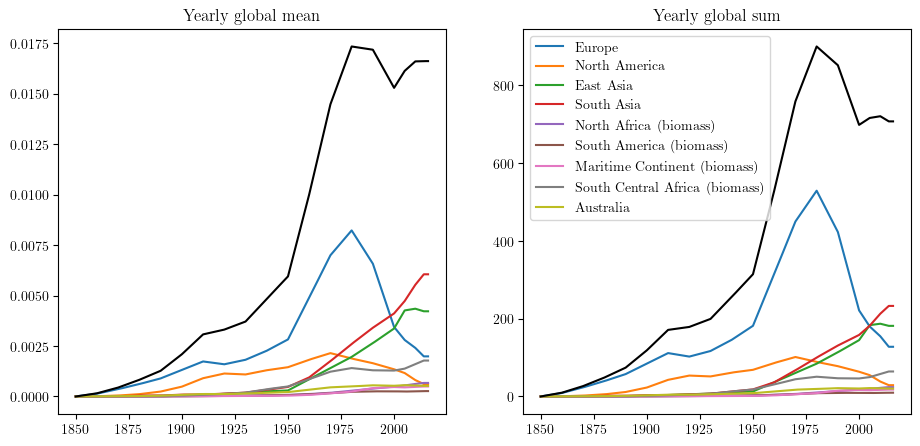

In [19]:
def plot():

    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(11,5))

    aod_sp_fldmean = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldmean_yearmean.nc').squeeze()
    aod_sp_fldsum = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldsum_yearsum.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    sum_aod_fldmean = macsp.years*0.
    sum_aod_fldsum = macsp.years*0.


    for i in range(1, 10, 1):

        ax1.plot(macsp.years, aod_sp_fldmean[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])
        sum_aod_fldmean += aod_sp_fldmean[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i)

        ax2.plot(macsp.years, aod_sp_fldsum[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])
        sum_aod_fldsum += aod_sp_fldsum[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i)

    ax1.plot(macsp.years, sum_aod_fldmean, color='black')
    ax2.plot(macsp.years, sum_aod_fldsum, color='black')

    ax1.set_title('Yearly global mean')
    ax2.set_title('Yearly global sum')

    #plt.xlim([2000, 2010])

    plt.legend()
    
        

plot()   

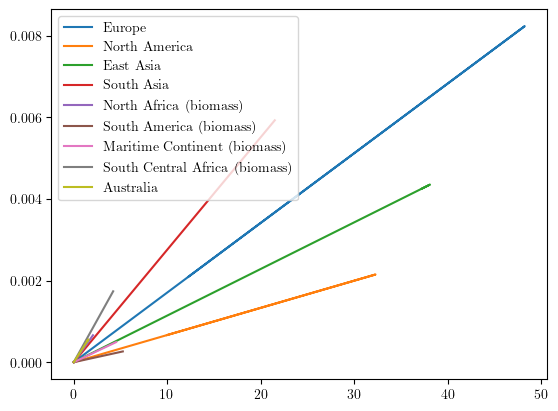

In [25]:
def plot():

    aod_sp = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldmean_yearmean.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    emissions = pd.DataFrame({
    'Europe': [8.95, 18.26, 56.80, 16.41, 11.35],
    'North America': [7.65, 24.09, 29.32, 17.45, 7.39],
    'East Asia': [0.17, 1.69, 14.72, 37.36, 34.89],
    'South Asia': [0.18, 1.57, 9.18, 17.17, 22.89],
    'North Africa': [0.08, 0.20, 1.02, 1.70, 1.94],
    'South America': [0.12, 1.24, 4.81, 4.88, 5.26],
    'Maritime Continent': [0.03, 0.22, 2.13, 4.15, 4.43],
    'South Central Africa': [0.04, 1.42, 3.83, 3.35, 4.29],
    'Australia': [0.23, 0.63, 1.61, 1.57, 1.39]
    },
    index=[1900, 1950, 1980, 2005, 2014])
    sum = macsp.year_weight.sel(plume_number=1).isel(years=slice(0,164)).values * 0

    for year in range(0, 164, 1):
        for plume_number in range(1, 10 ,1):
            sum[year] = sum[year] + macsp.year_weight.sel(plume_number=plume_number).isel(years=year)*emissions.iloc[:, plume_number-1].loc[2005]

    emission = pd.DataFrame({
        'Global': [17.54, 49.32, 123.42, 104.04, 93.83]
    },
    index=[1900, 1950, 1980, 2005, 2014])


    #sum_aod = macsp.isel(years=slice(0,164)).years*0.

    for i in range(1, 10, 1):

        plt.plot(macsp.year_weight.sel(plume_number=i).isel(years=slice(0,164))*emissions.iloc[:, i-1].loc[2005], aod_sp[f'aod_sp{i}']*macsp.isel(years=slice(0,164)).year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])

        #sum_aod += aod_sp[f'aod_sp{i}']*macsp.isel(years=slice(0,164)).year_weight.sel(plume_number=i)

    #plt.plot(macsp.years, sum_aod, color='black')
    #plt.xlim([2000, 2010])

    plt.legend()
    
        

plot()   

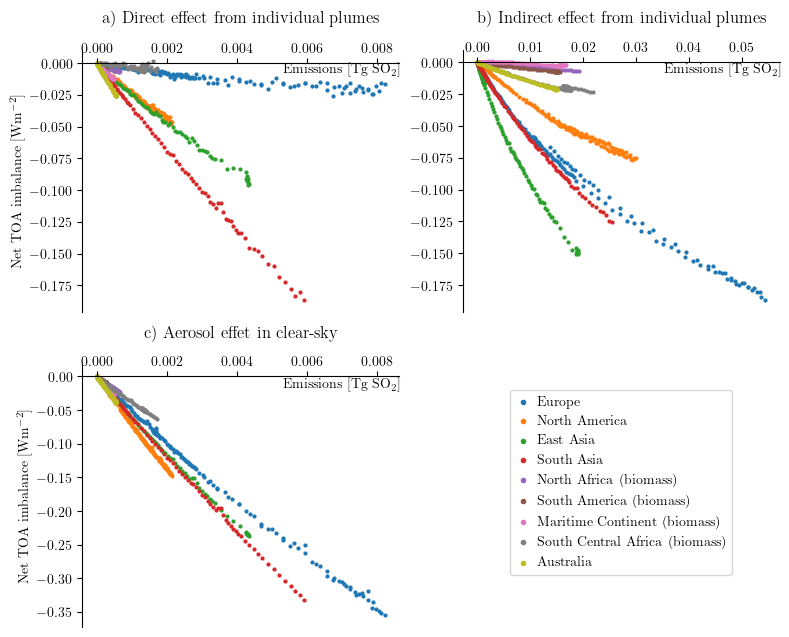

In [26]:
def plot_figure():

    fig = plt.figure()
    gs = GridSpec(2,2)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, 0])
    #fig.delaxes(gs[1, 1])

    subplots = {'direct': ax1,
                 'indirect': ax2,
                 'clear-sky':ax3}

    effects = ['direct', 'indirect','clear-sky']

    for ax in [ax1, ax2, ax3]:
        ax.spines['bottom'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['top'].set_color('none')

    historical_dir='/home/anthe/documents/misu/thesis/aerosol-prp/datasets/historical/'
    prp = xr.open_dataset(f'{historical_dir}/historical-CR_single-plumes_PRP_fldmean_yearmean.nc').squeeze()
    historical_dir='/home/anthe/documents/misu/paper_aerosols/historical/datasets/'
    clearSky = xr.open_dataset(f'{historical_dir}/historical_PRP_dR_fldmean_yearmean.nc').squeeze()
    
    ms=4
    macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')
    aod_sp = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldmean_yearmean.nc').squeeze()
    for effect in effects:
        for plume_number in range(1, 10, 1):
            label=macsp.attrs[f'plume{plume_number}_region']
            if effect == 'total':
                subplots[effect].scatter(macsp.year_weight.sel(plume_number=plume_number).isel(years=slice(0,164))*aod_sp[f'aod_sp{plume_number}'], prp[f'dR_sp{plume_number}_srad0'] + prp[f'dR_sp{plume_number}_trad0'], label=label, s=ms)
            
            elif effect == 'direct':
                subplots[effect].scatter(macsp.year_weight.sel(plume_number=plume_number).isel(years=slice(0,164))*aod_sp[f'aod_sp{plume_number}'], prp[f'dR_spd{plume_number}_srad0'] + prp[f'dR_spd{plume_number}_trad0'], label=label, s=ms)
            
            elif effect == 'indirect':
                subplots[effect].scatter(macsp.year_weight.sel(plume_number=plume_number).isel(years=slice(0,164))*(aod_sp[f'aod_sp{plume_number}'] + aod_sp[f'aod_bg{plume_number}']), prp[f'dR_spi{plume_number}_srad0'] + prp[f'dR_spi{plume_number}_trad0'], label=label, s=ms)
            
            elif effect == 'clear-sky':
                subplots[effect].scatter(macsp.year_weight.sel(plume_number=plume_number).isel(years=slice(0,164))*aod_sp[f'aod_sp{plume_number}'], clearSky[f'dR_spd{plume_number}_sraf0'] + clearSky[f'dR_spd{plume_number}_traf0'], label=label, s=ms)
    
    #for effect in effects:
    #    if effect == 'direct':
    #         ax1.scatter(sum, prp[f'dR_spd_srad0'] + prp[f'dR_spd_trad0'], label='Direct effect', color=colors['direct'], s=ms)
    #    elif effect == 'indirect':
    #        ax1.scatter(sum, prp[f'dR_spi_srad0'] + prp[f'dR_spi_trad0'], label='Indirect effect', color=colors['indirect'], s=ms)
    #    elif effect == 'total':
    #        ax1.scatter(sum, prp[f'dR_sp_srad0'] + prp[f'dR_sp_trad0'], label='Total effect', color='darkorange', s=ms)    

    ax1.set_title('a) Direct effect from individual plumes', pad=20)
    ax1.set_xlabel(r"Emissions [Tg SO$_2$]")
    ax1.xaxis.set_label_coords(.82, .95)
    #ax1.set_xlim([0, 50])
    #ax1.set_ylim([None, 0.005])
    ax1.set_ylabel("Net TOA imbalance [Wm$^{-2}$]")  
    ax1.tick_params(axis='x', direction='in', which='major', pad=-15)
    
    #ax2.tick_params(labelleft = False, labelright=False)
    ax2.set_title('b) Indirect effect from individual plumes', pad=20)
    #ax2.set_xlim([1850, 2014])
    #ax2.set_ylim([-0.2, 0.01])
    ax2.set_xlabel(r"Emissions [Tg SO$_2$]")
    ax2.xaxis.set_label_coords(.82, .95)
    #ax2.set_xlim([0, 50])
    #ax2.set_ylim([None, 0.005])
    #ax2.set_ylabel("Net TOA imbalance [Wm$^{-2}$]")  
    #ax2.yaxis.set_label_coords(1, -.08)
    #ax2.yaxis.tick_right()
    ax2.tick_params(axis='x', direction='in', which='major', pad=-15)

    ax3.set_title('c) Aerosol effet in clear-sky', pad=20)
    ax3.set_xlabel(r"Emissions [Tg SO$_2$]")
    ax3.xaxis.set_label_coords(.82, .95)
    #ax3.set_xlim([0, 50])
    #ax3.set_ylim([None, 0.005])
    ax3.set_ylabel("Net TOA imbalance [Wm$^{-2}$]")  
    ax3.tick_params(axis='x', direction='in', which='major', pad=-15)

   
    leg = ax2.legend(frameon=True, ncol=1,
                handletextpad=0.5, handlelength=1.0, loc=(.15,-1), markerscale=1.5)
    leg.set_zorder(1)
    
    fig = plt.gcf()
    fig.set_size_inches(9, 7.5)
    #fig.subplots_adjust(wspace=1)
    #plt.title('Gregory-regression difference between 2005 and 1970 \nin abrupt-aerosol experiments')
    #plt.tight_layout()
    plt.savefig(f'../figures/forcing-vs-emissions-individual-plumes.pdf')

plot_figure()

/tmp/ipykernel_4329/2555614159.py:43: RuntimeWarning: invalid value encountered in divide
  ax4.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values)/(sum_aod.values*1000), color=colors['direct'], linestyle='-', linewidth=1.5, label='normalized by emissions')
/tmp/ipykernel_4329/2555614159.py:44: RuntimeWarning: divide by zero encountered in divide
  ax4.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values)/(sum_aod.values*1000), color=colors['indirect'], linestyle='-', linewidth=1.5,label='indirect effect')


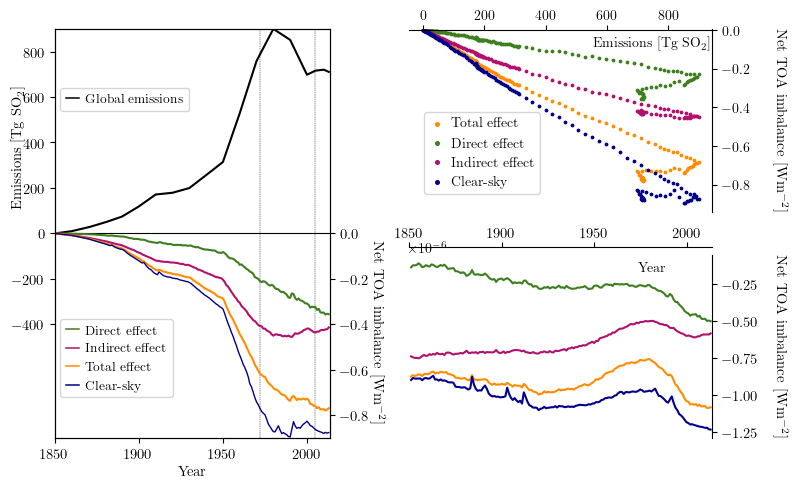

In [4]:
def plot():

    #fig = plt.gcf()
    #fig.set_size_inches(10, 8)
    fig = plt.figure()
    gs = GridSpec(2,2, width_ratios=[1,1.1])
    ax1 = fig.add_subplot(gs[:, 0])
    ax3 = fig.add_subplot(gs[0, 1])
    ax4 = fig.add_subplot(gs[1, 1])
    #ax1 = plt.subplot(121)
    #ax3 = plt.subplot(223)
    #ax4 = plt.subplot(224)
    #fig, axs = plt.subplots(2,2,figsize=(6,6), gridspec_kw={'width_ratios': [2, 2]})
    #fig.delaxes(axs[1, 0])

    #ax1 = axs[0,0]
    ax2 = ax1.twinx()

    historical_dir='/home/anthe/documents/misu/paper_aerosols/historical/datasets/'
    prp = xr.open_dataset(f'{historical_dir}/historical_PRP_dR_fldmean_yearmean.nc').squeeze()

    aod_sp = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldsum_yearsum.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    sum_aod = macsp.isel(years=slice(0,164)).years*0.

    for i in range(1, 10, 1):

        #plt.plot(macsp.years, aod_sp[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])

        sum_aod += aod_sp[f'aod_sp{i}']*macsp.year_weight.isel(years=slice(0,164)).sel(plume_number=i)


    time = np.arange(1850, 1850 + prp.time.size, 1)

    plt.axhline(0, color='black', linewidth=0.8)

    ax2.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values), color=colors['direct'], linestyle='-', label='direct effect')
    ax2.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values), color=colors['indirect'], linestyle='-', label='indirect effect')
    ax2.plot(time, (prp.dR_sp_srad0.values + prp.dR_sp_trad0), 'darkorange', linestyle='-', label='total effect')
    ax2.plot(time, (prp.dR_spd_sraf0.values + prp.dR_spd_traf0), 'darkblue', linestyle='-', linewidth=1,label='aerosol effect clear-sky')

    ax4.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values)/(sum_aod.values*1000), color=colors['direct'], linestyle='-', linewidth=1.5, label='normalized by emissions')
    ax4.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values)/(sum_aod.values*1000), color=colors['indirect'], linestyle='-', linewidth=1.5,label='indirect effect')
    ax4.plot(time, (prp.dR_sp_srad0.values + prp.dR_sp_trad0)/(sum_aod.values*1000), 'darkorange', linestyle='-', linewidth=1.5,label='total effect')
    ax4.plot(time, (prp.dR_sp_sraf0.values + prp.dR_sp_traf0)/(sum_aod.values*1000), 'darkblue', linestyle='-', linewidth=1.5,label='clear-sky')
    
    ax1.plot(time, sum_aod, 'black', label='Total AOD')

    ax2.set_ylim([-.9, .9])    
    ax1.set_ylim([-max(sum_aod), max(sum_aod)])   

    #aod_sp = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldmean_yearmean.nc').squeeze()
    #sum_aod = macsp.isel(years=slice(0,164)).years*0.

    #for i in range(1, 10, 1):

        #plt.plot(macsp.years, aod_sp[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])

     #   sum_aod += aod_sp[f'aod_sp{i}']*macsp.year_weight.isel(years=slice(0,164)).sel(plume_number=i)

    ms=3
    macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')
    effects = ['total', 'direct', 'indirect', 'clear-sky']
    for effect in effects:
        if effect == 'direct':
             ax3.scatter(sum_aod, prp[f'dR_spd_srad0'] + prp[f'dR_spd_trad0'], label='Direct effect', color=colors['direct'], s=ms)
        elif effect == 'indirect':
            ax3.scatter(sum_aod, prp[f'dR_spi_srad0'] + prp[f'dR_spi_trad0'], label='Indirect effect', color=colors['indirect'], s=ms)
        elif effect == 'total':
            ax3.scatter(sum_aod, prp[f'dR_sp_srad0'] + prp[f'dR_sp_trad0'], label='Total effect', color='darkorange', s=ms)  
        elif effect == 'clear-sky':
            ax3.scatter(sum_aod, prp[f'dR_spd_sraf0'] + prp[f'dR_spd_traf0'], label='Clear-sky', color='darkblue', s=ms)  
    
    for ax in [ax3, ax4]:
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_color('none')
        ax.spines['top'].set_color('none') 
        ax.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

    fs=10.5
    ax3.set_xlabel(r"Emissions [Tg SO$_2$]")
    #ax3.set_xlim([0, 120])
    ax3.set_ylim([None, 0.005])
    ax3.xaxis.set_label_coords(.8, .96)
    ax3.tick_params(axis='x', direction='in', which='major', pad=-15)
    ax3.legend(frameon=True, ncol=1,
                handletextpad=0.5, handlelength=1.0, loc=(0.05,.1), markerscale=1.5)
    ax3.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax3.yaxis.set_label_coords(1.2,0.5)
    
    ax4.set_xlabel(r"Year")
    ax4.set_xlim([1850, 2014])
    #ax4.set_ylim([None, 0.00])
    ax4.tick_params(axis='both', which='major', labelsize=fs)
    ax4.tick_params(axis='both', which='major', labelsize=fs)
    ax4.set_xticks(np.arange(1850, 2001, 50))
    ax4.xaxis.set_label_coords(.8, .96)
    ax4.tick_params(axis='x', direction='in', which='major', pad=-15)
    ax4.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax4.yaxis.set_label_coords(1.2,0.5)
    #ax4.legend(frameon=True, ncol=1,
    #            handletextpad=0.5, handlelength=1.0, loc=(0.05,.2), markerscale=1.5)

    plt.subplots_adjust(wspace=0.4)

    ax1.yaxis.get_major_ticks()[1].set_visible(False)
    ax1.yaxis.get_major_ticks()[2].set_visible(False)

    ax2.yaxis.get_major_ticks()[6].set_visible(False)
    ax2.yaxis.get_major_ticks()[7].set_visible(False)
    ax2.yaxis.get_major_ticks()[8].set_visible(False)
    ax2.yaxis.get_major_ticks()[9].set_visible(False)

    fs=10.5
    #plt.plot(time_prp, prp.dR_aer_srad0.values, 'darkblue', linestyle='--')
    ax1.set_xlabel('Year', fontsize=fs)
    ax1.set_ylabel(r'Emissions [Tg SO$_2$]', fontsize=fs, labelpad=30)
    ax1.yaxis.set_label_coords(-.11,0.71)
    ax2.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax2.yaxis.set_label_coords(1.2,0.26)

    ax1.set_xlim([1850, 2014])
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    plt.xticks(np.arange(1850, 2001, 50))
    #plt.ylim([-0.2, None])
    #ax1.legend(loc=(0.01, 0.8))
    fig = plt.gcf()
    fig.set_size_inches(8, 5)

    legend_elements = [
    Line2D([0],[2],color="black",markerfacecolor="black",markersize=10,linewidth=1.1)
    ]
    labels = ["Global emissions"]
    ax1.legend(handles=legend_elements, frameon=True, ncol=1, labels=labels, fontsize=9.5,
    handletextpad=0.5, handlelength=1.0, loc=(0.02,0.8))

    legend_elements = [
    Line2D([0],[2],color=colors['direct'],markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color=colors['indirect'],markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color="darkorange",markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color="darkblue",markerfacecolor="black",markersize=10,linewidth=1.1),
    ]
    labels = ["Direct effect", "Indirect effect", "Total effect", "Clear-sky"
]
    leg = ax2.legend(handles=legend_elements, frameon=True, ncol=1, labels=labels, fontsize=9.5,
    handletextpad=0.5, handlelength=1.0, loc=(0.02,0.1))

    ax1.axvline(x=1972, color='black', linewidth=0.3, linestyle='--')
    ax1.axvline(x=2005, color='black', linewidth=0.3, linestyle='--')
    plt.subplots_adjust(wspace=0.4)

    leg.set_zorder(1)
    

    plt.tight_layout()
    #plt.savefig(f'../figures/global-forcing.pdf',bbox_inches='tight')
    
plot()

/tmp/ipykernel_4329/2691688039.py:43: RuntimeWarning: invalid value encountered in divide
  ax4.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values)/(sum_aod.values*1000), color=colors['direct'], linestyle='-', linewidth=1.5, label='normalized by emissions')
/tmp/ipykernel_4329/2691688039.py:44: RuntimeWarning: divide by zero encountered in divide
  ax4.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values)/(sum_aod.values*1000), color=colors['indirect'], linestyle='-', linewidth=1.5,label='indirect effect')


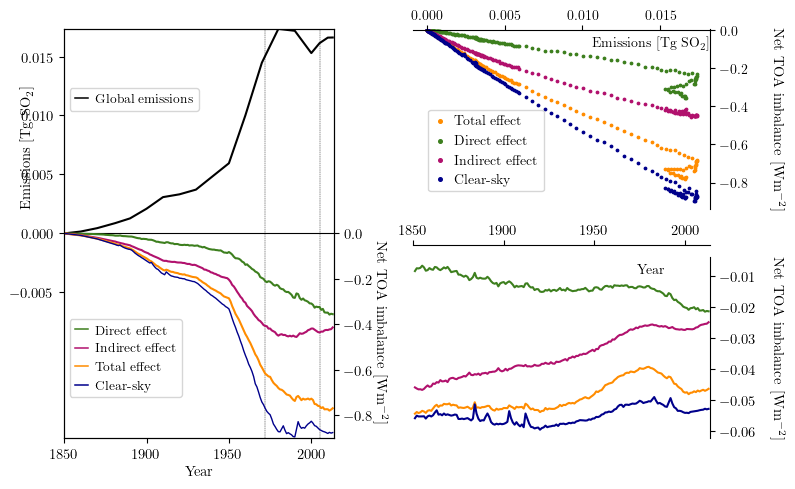

In [6]:
def plot():

    #fig = plt.gcf()
    #fig.set_size_inches(10, 8)
    fig = plt.figure()
    gs = GridSpec(2,2, width_ratios=[1,1.1])
    ax1 = fig.add_subplot(gs[:, 0])
    ax3 = fig.add_subplot(gs[0, 1])
    ax4 = fig.add_subplot(gs[1, 1])
    #ax1 = plt.subplot(121)
    #ax3 = plt.subplot(223)
    #ax4 = plt.subplot(224)
    #fig, axs = plt.subplots(2,2,figsize=(6,6), gridspec_kw={'width_ratios': [2, 2]})
    #fig.delaxes(axs[1, 0])

    #ax1 = axs[0,0]
    ax2 = ax1.twinx()

    historical_dir='/home/anthe/documents/misu/paper_aerosols/historical/datasets/'
    prp = xr.open_dataset(f'{historical_dir}/historical_PRP_dR_fldmean_yearmean.nc').squeeze()

    aod_sp = xr.open_dataset('/home/anthe/documents/misu/paper_aerosols/aod_sp/datasets/aod_sp_2005_fldmean_yearmean.nc').squeeze()
    macsp = xr.open_dataset('/home/anthe/documents/misu/thesis/MAC-SP.nc')

    sum_aod = macsp.isel(years=slice(0,164)).years*0.

    for i in range(1, 10, 1):

        #plt.plot(macsp.years, aod_sp[f'aod_sp{i}']*macsp.year_weight.sel(plume_number=i), label=macsp.attrs[f'plume{i}_region'])

        sum_aod += aod_sp[f'aod_sp{i}']*macsp.year_weight.isel(years=slice(0,164)).sel(plume_number=i)


    time = np.arange(1850, 1850 + prp.time.size, 1)

    plt.axhline(0, color='black', linewidth=0.8)

    ax2.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values), color=colors['direct'], linestyle='-', label='direct effect')
    ax2.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values), color=colors['indirect'], linestyle='-', label='indirect effect')
    ax2.plot(time, (prp.dR_sp_srad0.values + prp.dR_sp_trad0), 'darkorange', linestyle='-', label='total effect')
    ax2.plot(time, (prp.dR_spd_sraf0.values + prp.dR_spd_traf0), 'darkblue', linestyle='-', linewidth=1,label='aerosol effect clear-sky')

    ax4.plot(time, (prp.dR_spd_srad0.values + prp.dR_spd_trad0.values)/(sum_aod.values*1000), color=colors['direct'], linestyle='-', linewidth=1.5, label='normalized by emissions')
    ax4.plot(time, (prp.dR_spi_srad0.values + prp.dR_spi_trad0.values)/(sum_aod.values*1000), color=colors['indirect'], linestyle='-', linewidth=1.5,label='indirect effect')
    ax4.plot(time, (prp.dR_sp_srad0.values + prp.dR_sp_trad0)/(sum_aod.values*1000), 'darkorange', linestyle='-', linewidth=1.5,label='total effect')
    ax4.plot(time, (prp.dR_sp_sraf0.values + prp.dR_sp_traf0)/(sum_aod.values*1000), 'darkblue', linestyle='-', linewidth=1.5,label='clear-sky')
    
    ax1.plot(time, sum_aod, 'black', label='Total AOD')

    ax2.set_ylim([-.9, .9])    
    ax1.set_ylim([-max(sum_aod), max(sum_aod)])   

    ms=3
    macsp = xr.open_dataset(f'{MACSP_dir}/MAC-SP.nc')
    effects = ['total', 'direct', 'indirect', 'clear-sky']
    for effect in effects:
        if effect == 'direct':
             ax3.scatter(sum_aod, prp[f'dR_spd_srad0'] + prp[f'dR_spd_trad0'], label='Direct effect', color=colors['direct'], s=ms)
        elif effect == 'indirect':
            ax3.scatter(sum_aod, prp[f'dR_spi_srad0'] + prp[f'dR_spi_trad0'], label='Indirect effect', color=colors['indirect'], s=ms)
        elif effect == 'total':
            ax3.scatter(sum_aod, prp[f'dR_sp_srad0'] + prp[f'dR_sp_trad0'], label='Total effect', color='darkorange', s=ms)  
        elif effect == 'clear-sky':
            ax3.scatter(sum_aod, prp[f'dR_spd_sraf0'] + prp[f'dR_spd_traf0'], label='Clear-sky', color='darkblue', s=ms)  
    
    for ax in [ax3, ax4]:
        ax.spines['bottom'].set_position('zero')
        ax.spines['left'].set_color('none')
        ax.spines['top'].set_color('none') 
        ax.tick_params(axis='y', labelright=True, labelleft=False, right=True, left=False)

    fs=10.5
    ax3.set_xlabel(r"Emissions [Tg SO$_2$]")
    #ax3.set_xlim([0, 120])
    ax3.set_ylim([None, 0.005])
    ax3.xaxis.set_label_coords(.8, .96)
    ax3.tick_params(axis='x', direction='in', which='major', pad=-15)
    ax3.legend(frameon=True, ncol=1,
                handletextpad=0.5, handlelength=1.0, loc=(0.05,.1), markerscale=1.5)
    ax3.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax3.yaxis.set_label_coords(1.2,0.5)
    
    ax4.set_xlabel(r"Year")
    ax4.set_xlim([1850, 2014])
    #ax4.set_ylim([None, 0.00])
    ax4.tick_params(axis='both', which='major', labelsize=fs)
    ax4.tick_params(axis='both', which='major', labelsize=fs)
    ax4.set_xticks(np.arange(1850, 2001, 50))
    ax4.xaxis.set_label_coords(.8, .96)
    ax4.tick_params(axis='x', direction='in', which='major', pad=-15)
    ax4.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax4.yaxis.set_label_coords(1.2,0.5)
    #ax4.legend(frameon=True, ncol=1,
    #            handletextpad=0.5, handlelength=1.0, loc=(0.05,.2), markerscale=1.5)

    plt.subplots_adjust(wspace=0.4)

    ax1.yaxis.get_major_ticks()[1].set_visible(False)
    ax1.yaxis.get_major_ticks()[2].set_visible(False)

    ax2.yaxis.get_major_ticks()[6].set_visible(False)
    ax2.yaxis.get_major_ticks()[7].set_visible(False)
    ax2.yaxis.get_major_ticks()[8].set_visible(False)
    ax2.yaxis.get_major_ticks()[9].set_visible(False)

    fs=10.5
    #plt.plot(time_prp, prp.dR_aer_srad0.values, 'darkblue', linestyle='--')
    ax1.set_xlabel('Year', fontsize=fs)
    ax1.set_ylabel(r'Emissions [Tg SO$_2$]', fontsize=fs, labelpad=30)
    ax1.yaxis.set_label_coords(-.11,0.71)
    ax2.set_ylabel(r'Net TOA imbalance [Wm$^{-2}$]', rotation=-90, labelpad=70, fontsize=fs)
    ax2.yaxis.set_label_coords(1.2,0.26)

    ax1.set_xlim([1850, 2014])
    ax1.tick_params(axis='both', which='major', labelsize=fs)
    ax2.tick_params(axis='both', which='major', labelsize=fs)
    plt.xticks(np.arange(1850, 2001, 50))
    #plt.ylim([-0.2, None])
    #ax1.legend(loc=(0.01, 0.8))
    fig = plt.gcf()
    fig.set_size_inches(8, 5)

    legend_elements = [
    Line2D([0],[2],color="black",markerfacecolor="black",markersize=10,linewidth=1.1)
    ]
    labels = ["Global emissions"]
    ax1.legend(handles=legend_elements, frameon=True, ncol=1, labels=labels, fontsize=9.5,
    handletextpad=0.5, handlelength=1.0, loc=(0.02,0.8))

    legend_elements = [
    Line2D([0],[2],color=colors['direct'],markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color=colors['indirect'],markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color="darkorange",markerfacecolor="black",markersize=10,linewidth=1.1),
    Line2D([0],[2],color="darkblue",markerfacecolor="black",markersize=10,linewidth=1.1),
    ]
    labels = ["Direct effect", "Indirect effect", "Total effect", "Clear-sky"
]
    leg = ax2.legend(handles=legend_elements, frameon=True, ncol=1, labels=labels, fontsize=9.5,
    handletextpad=0.5, handlelength=1.0, loc=(0.02,0.1))

    ax1.axvline(x=1972, color='black', linewidth=0.3, linestyle='--')
    ax1.axvline(x=2005, color='black', linewidth=0.3, linestyle='--')
    plt.subplots_adjust(wspace=0.4)

    leg.set_zorder(1)
    

    plt.tight_layout()
    #plt.savefig(f'../figures/global-forcing.pdf',bbox_inches='tight')
    
plot()

In [1]:
(5.5*10**-7)

5.5e-07